## Stock Market Prediction Using Different Machine Learning Algorithms


In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset
df=pd.read_csv("Stock_ABDI1.csv")
df['datetime'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')
df.index = df['datetime']
df.dropna()
df_new = df[["<FIRST>","<HIGH>","<LOW>","<CLOSE>","<VALUE>","<VOL>"]]
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>
datetime,,,,,,
2001-03-25,26000.0,26000.0,24885.0,24885.0,112766576,4520
2001-03-26,24885.0,24885.0,24885.0,24885.0,1119825,45
2001-04-08,25000.0,25000.0,25000.0,25000.0,50000000,2000
2001-04-10,25003.0,25003.0,25003.0,25003.0,1750210,70
2001-04-15,25010.0,25010.0,25010.0,25010.0,3001200,120


## Calculating the technical indicators

In [3]:
#1. Simple n day moving average
def moving_average(df, n):
    """Calculate the moving average for the given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    MA = pd.Series(df['<CLOSE>'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    df = df.join(MA)
    return df
df_new = moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,MA_10
datetime,,,,,,,
2020-05-26,56893.0,60313.0,56890.0,57183.0,63584582573,1112100,53564.5
2020-05-27,54317.0,56000.0,54317.0,54558.0,158334486285,2902152,53612.9
2020-05-30,55001.0,57285.0,55001.0,56601.0,91570928155,1617823,54134.7
2020-05-31,58870.0,58870.0,53771.0,56128.0,68818222651,1226100,54729.1
2020-06-01,58450.0,58934.0,55516.0,58399.0,109955845548,1882827,55767.9


In [4]:
#2. Weighted Moving Average (WMA)
def weighted_moving_average(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    WMA = pd.Series(df['<CLOSE>'].ewm(span=n, min_periods=n).mean(), name='WMA_' + str(n))
    df = df.join(WMA)
    return df
df_new = weighted_moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,MA_10,WMA_10
datetime,,,,,,,,
2020-05-26,56893.0,60313.0,56890.0,57183.0,63584582573,1112100,53564.5,55002.149356
2020-05-27,54317.0,56000.0,54317.0,54558.0,158334486285,2902152,53612.9,54921.394928
2020-05-30,55001.0,57285.0,55001.0,56601.0,91570928155,1617823,54134.7,55226.777668
2020-05-31,58870.0,58870.0,53771.0,56128.0,68818222651,1226100,54729.1,55390.636274
2020-06-01,58450.0,58934.0,55516.0,58399.0,109955845548,1882827,55767.9,55937.611497


In [5]:
#3. Momentum
def momentum(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    M = pd.Series(df['<CLOSE>'].diff(n), name='MOM_' + str(n))
    df = df.join(M)
    return df
df_new = momentum(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,MA_10,WMA_10,MOM_10
datetime,,,,,,,,,
2020-05-26,56893.0,60313.0,56890.0,57183.0,63584582573,1112100,53564.5,55002.149356,414.0
2020-05-27,54317.0,56000.0,54317.0,54558.0,158334486285,2902152,53612.9,54921.394928,484.0
2020-05-30,55001.0,57285.0,55001.0,56601.0,91570928155,1617823,54134.7,55226.777668,5218.0
2020-05-31,58870.0,58870.0,53771.0,56128.0,68818222651,1226100,54729.1,55390.636274,5944.0
2020-06-01,58450.0,58934.0,55516.0,58399.0,109955845548,1882827,55767.9,55937.611497,10388.0


In [6]:
#4. Stochastic K%
def stochastic_oscillator_k(df):
    """Calculate stochastic oscillator %K for given data.
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO_k')
    df = df.join(SOk)
    return df
df_new = stochastic_oscillator_k(df_new)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,MA_10,WMA_10,MOM_10,SO_k
datetime,,,,,,,,,,
2020-05-26,56893.0,60313.0,56890.0,57183.0,63584582573,1112100,53564.5,55002.149356,414.0,0.085597
2020-05-27,54317.0,56000.0,54317.0,54558.0,158334486285,2902152,53612.9,54921.394928,484.0,0.143197
2020-05-30,55001.0,57285.0,55001.0,56601.0,91570928155,1617823,54134.7,55226.777668,5218.0,0.700525
2020-05-31,58870.0,58870.0,53771.0,56128.0,68818222651,1226100,54729.1,55390.636274,5944.0,0.462247
2020-06-01,58450.0,58934.0,55516.0,58399.0,109955845548,1882827,55767.9,55937.611497,10388.0,0.843476


In [7]:
#5. Stochastic D%
def stochastic_oscillator_d(df, n):
    """Calculate stochastic oscillator %D for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO%k')
    SOd = pd.Series(SOk.ewm(span=n, min_periods=n).mean(), name='SO_' + str(n))
    df = df.join(SOd)
    return df
df_new = stochastic_oscillator_d(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,MA_10,WMA_10,MOM_10,SO_k,SO_10
datetime,,,,,,,,,,,
2020-05-26,56893.0,60313.0,56890.0,57183.0,63584582573,1112100,53564.5,55002.149356,414.0,0.085597,0.497998
2020-05-27,54317.0,56000.0,54317.0,54558.0,158334486285,2902152,53612.9,54921.394928,484.0,0.143197,0.418632
2020-05-30,55001.0,57285.0,55001.0,56601.0,91570928155,1617823,54134.7,55226.777668,5218.0,0.700525,0.479155
2020-05-31,58870.0,58870.0,53771.0,56128.0,68818222651,1226100,54729.1,55390.636274,5944.0,0.462247,0.475640
2020-06-01,58450.0,58934.0,55516.0,58399.0,109955845548,1882827,55767.9,55937.611497,10388.0,0.843476,0.550159


In [8]:
#6. Relative Strength Index
#Error
"""
def relative_strength_index(df, n):
    Calculate Relative Strength Index(RSI) for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    i = df.index[0]
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])
        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)

    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())

    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['RSI_' + str(n)])
    rsi = rsi.set_index(df.index)
    df = df.join(rsi)
    return df
"""

"\ndef relative_strength_index(df, n):\n    Calculate Relative Strength Index(RSI) for given data.\n    :param df: pandas.DataFrame\n    :param n:\n    :return: pandas.DataFrame\n    i = df.index[0]\n    UpI = [0]\n    DoI = [0]\n    while i + 1 <= df.index[-1]:\n        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])\n        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])\n        if UpMove > DoMove and UpMove > 0:\n            UpD = UpMove\n        else:\n            UpD = 0\n        UpI.append(UpD)\n        if DoMove > UpMove and DoMove > 0:\n            DoD = DoMove\n        else:\n            DoD = 0\n        DoI.append(DoD)\n        i = i + 1\n    UpI = pd.Series(UpI)\n\n    DoI = pd.Series(DoI)\n    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())\n    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())\n\n    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))\n    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['R

In [9]:
#7. Signal
def macd(df, n_fast, n_slow):
    """Calculate MACD, MACD Signal and MACD difference
    :param df: pandas.DataFrame
    :param n_fast:
    :param n_slow:
    :return: pandas.DataFrame
    """
    EMAfast = pd.Series(df['<CLOSE>'].ewm(span=n_fast, min_periods=n_slow).mean())
    EMAslow = pd.Series(df['<CLOSE>'].ewm(span=n_slow, min_periods=n_slow).mean())
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df
df_new = macd(df_new,12,26)
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
datetime,,,,,,,,,,,,,,
2001-03-25,26000.0,26000.0,24885.0,24885.0,112766576,4520,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2001-03-26,24885.0,24885.0,24885.0,24885.0,1119825,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-08,25000.0,25000.0,25000.0,25000.0,50000000,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-10,25003.0,25003.0,25003.0,25003.0,1750210,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-15,25010.0,25010.0,25010.0,25010.0,3001200,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#8. Larry Williams R%
#lEFT

In [11]:
#9. Accumulation / Distribution
def accumulation_distribution(df, n):
    """Calculate Accumulation/Distribution for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    ad = (2 * df['<CLOSE>'] - df['<HIGH>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']) * df['<VOL>']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    df = df.join(AD)
    return df
df_new = accumulation_distribution(df_new,10)
df_new.tail()

F:\ana\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10
datetime,,,,,,,,,,,,,,,
2020-05-26,56893.0,60313.0,56890.0,57183.0,63584582573,1112100,53564.5,55002.149356,414.0,0.085597,0.497998,2073.423535,1790.701298,282.722237,-0.208579
2020-05-27,54317.0,56000.0,54317.0,54558.0,158334486285,2902152,53612.9,54921.394928,484.0,0.143197,0.418632,1913.574327,1815.275904,98.298423,0.180189
2020-05-30,55001.0,57285.0,55001.0,56601.0,91570928155,1617823,54134.7,55226.777668,5218.0,0.700525,0.479155,1929.503588,1838.121441,91.382147,-3.989948
2020-05-31,58870.0,58870.0,53771.0,56128.0,68818222651,1226100,54729.1,55390.636274,5944.0,0.462247,0.475640,1882.262939,1846.949741,35.313199,-0.928358
2020-06-01,58450.0,58934.0,55516.0,58399.0,109955845548,1882827,55767.9,55937.611497,10388.0,0.843476,0.550159,2004.963138,1878.552420,126.410718,-0.353527


In [12]:
#10. Commodity Channel Index
def commodity_channel_index(df, n):
    """Calculate Commodity Channel Index for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    PP = (df['<HIGH>'] + df['<LOW>'] + df['<CLOSE>']) / 3
    CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                    name='CCI_' + str(n))
    df = df.join(CCI)
    return df
df_new = commodity_channel_index(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,
2020-05-26,56893.0,60313.0,56890.0,57183.0,63584582573,1112100,53564.5,55002.149356,414.0,0.085597,0.497998,2073.423535,1790.701298,282.722237,-0.208579,1.149889
2020-05-27,54317.0,56000.0,54317.0,54558.0,158334486285,2902152,53612.9,54921.394928,484.0,0.143197,0.418632,1913.574327,1815.275904,98.298423,0.180189,0.325225
2020-05-30,55001.0,57285.0,55001.0,56601.0,91570928155,1617823,54134.7,55226.777668,5218.0,0.700525,0.479155,1929.503588,1838.121441,91.382147,-3.989948,0.556432
2020-05-31,58870.0,58870.0,53771.0,56128.0,68818222651,1226100,54729.1,55390.636274,5944.0,0.462247,0.475640,1882.262939,1846.949741,35.313199,-0.928358,0.413202
2020-06-01,58450.0,58934.0,55516.0,58399.0,109955845548,1882827,55767.9,55937.611497,10388.0,0.843476,0.550159,2004.963138,1878.552420,126.410718,-0.353527,0.663146


In [13]:
df_new.mean()

<FIRST>            1.606974e+04
<HIGH>             1.624670e+04
<LOW>              1.585039e+04
<CLOSE>            1.604883e+04
<VALUE>            5.758089e+09
<VOL>              1.859359e+05
MA_10              1.597267e+04
WMA_10             1.597444e+04
MOM_10             1.040361e+02
SO_k                        NaN
SO_10              1.187467e+00
MACD_12_26         5.507259e+01
MACDsign_12_26     5.036558e+01
MACDdiff_12_26     2.516932e+00
Acc/Dist_ROC_10             NaN
CCI_10             1.268434e-01
dtype: float64

In [14]:
df_new.min()

<FIRST>            2.347000e+03
<HIGH>             2.347000e+03
<LOW>              2.346000e+03
<CLOSE>            2.286000e+03
<VALUE>            2.403000e+03
<VOL>              1.000000e+00
MA_10              2.319200e+03
WMA_10             2.503167e+03
MOM_10            -3.689900e+04
SO_k                       -inf
SO_10             -1.125755e+02
MACD_12_26        -7.693116e+03
MACDsign_12_26    -6.679710e+03
MACDdiff_12_26    -4.606145e+03
Acc/Dist_ROC_10            -inf
CCI_10            -2.846030e+00
dtype: float64

In [15]:
df_new.max()

<FIRST>            6.600000e+04
<HIGH>             6.600000e+04
<LOW>              6.270000e+04
<CLOSE>            6.295800e+04
<VALUE>            4.451761e+11
<VOL>              1.636167e+07
MA_10              5.952750e+04
WMA_10             5.865038e+04
MOM_10             1.775000e+04
SO_k                        inf
SO_10              1.463329e+02
MACD_12_26         5.392817e+03
MACDsign_12_26     4.669556e+03
MACDdiff_12_26     1.761324e+03
Acc/Dist_ROC_10             inf
CCI_10             2.845916e+00
dtype: float64

In [16]:
df_new.std()

<FIRST>            1.236178e+04
<HIGH>             1.253165e+04
<LOW>              1.208258e+04
<CLOSE>            1.231582e+04
<VALUE>            2.062662e+10
<VOL>              6.128712e+05
MA_10              1.214654e+04
WMA_10             1.211800e+04
MOM_10             3.291061e+03
SO_k                        NaN
SO_10              1.685425e+01
MACD_12_26         1.045193e+03
MACDsign_12_26     9.628746e+02
MACDdiff_12_26     3.545375e+02
Acc/Dist_ROC_10             NaN
CCI_10             1.296163e+00
dtype: float64

## Normalizing Data

In [18]:
data = (df_new - df_new.mean()) / (df_new.max() - df_new.min())
data.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,
2020-05-26,0.641341,0.692289,0.679982,0.677976,0.129896,0.056606,0.657105,0.695096,0.005672,NaN,-0.002663,0.154238,0.153343,0.044006,NaN,0.179736
2020-05-27,0.600871,0.624531,0.637350,0.634711,0.342733,0.166011,0.657951,0.693658,0.006953,NaN,-0.002970,0.142023,0.155509,0.015042,NaN,0.034853
2020-05-30,0.611617,0.644719,0.648683,0.668384,0.192762,0.087515,0.667072,0.699097,0.093578,NaN,-0.002736,0.143240,0.157522,0.013956,NaN,0.075473
2020-05-31,0.672400,0.669620,0.628303,0.660588,0.141652,0.063573,0.677462,0.702015,0.106863,NaN,-0.002749,0.139630,0.158300,0.005151,NaN,0.050309
2020-06-01,0.665801,0.670625,0.657216,0.698018,0.234060,0.103711,0.695620,0.711757,0.188182,NaN,-0.002462,0.149007,0.161084,0.019457,NaN,0.094221


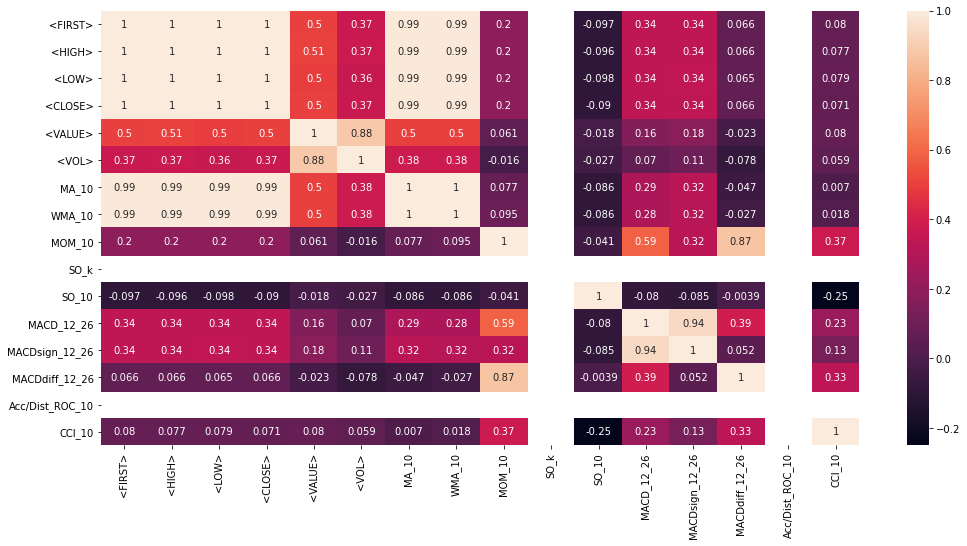

In [19]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [21]:
##Defining the features and labels
X = data.iloc[:,6:]
X.tail()

,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,
2020-05-26,0.657105,0.695096,0.005672,NaN,-0.002663,0.154238,0.153343,0.044006,NaN,0.179736
2020-05-27,0.657951,0.693658,0.006953,NaN,-0.002970,0.142023,0.155509,0.015042,NaN,0.034853
2020-05-30,0.667072,0.699097,0.093578,NaN,-0.002736,0.143240,0.157522,0.013956,NaN,0.075473
2020-05-31,0.677462,0.702015,0.106863,NaN,-0.002749,0.139630,0.158300,0.005151,NaN,0.050309
2020-06-01,0.695620,0.711757,0.188182,NaN,-0.002462,0.149007,0.161084,0.019457,NaN,0.094221
